In [33]:
#write a class with the following API
import numpy as np


In [34]:
class MyFirstLogReg(object):
    def __init__(self, tol = 10**-8, max_iterations =20):
        self.tolerance = tol
        self.max_iterations = max_iterations
        self.beta = None
        self.alpha = 0
        
    def predict(self,Xint):
        XB=Xint.dot(self.b)
        R=(1+np.exp(-1*XB))**-1
        return R
    def compute_gradient(self, Xint, y, p):
        S=(y-p).dot(Xint)
        return S
    
    def compute_hessian(self,Xint,P):
        Q = np.diag(P*(1-P))
        return (Xint.T).dot(Q).dot(Xint)
    
    def update_weights(self,Xint,y,i):
        p=self.predict(Xint)
        g=self.compute_gradient(Xint, y, p)
        H=self.compute_hessian(Xint, p)
        
        self.prior_b=self.b
        self.b=self.b + np.linalg.inv(H).dot(g)
        
    def check_stop(self):
        b_old_norm = self.prior_b /(np.sqrt(self.prior_b.dot(self.prior_b)))
        b_new_norm = self.b/(np.sqrt(self.b.dot(self.b)))
        diff = b_new_norm - b_old_norm
        return (np.sqrt(diff.dot(diff))<self.tolerance)
    
    def fit(self, X, y):
        self.b=np.zeros(X.shape[1]+1)
        self.b[-1] = np.log(y.mean()/(1-y.mean()))
        
        Xint =np.hstack((X,np.ones((X.shape[0],1))))
        
        for i in range(self.max_iterations):
            self.update_weights(Xint, y, i)
            self.beta = self.b[0:-1]
            self.alpha =self.b[-1]
            if self.check_stop():
                break
        
        

In [35]:
def gen_logistic(N,K,Beta,Alpha):
    X = np.random.random((N,K))
    XB = X.dot(Beta)+Alpha*np.ones(N)
    P = (1+np.exp(-1*XB))**-1
    Y = (np.random.random(N)<P)
    return X, Y

K=2
Beta = 2*(np.random.random(K)-1)
Alpha = -1

X,Y = gen_logistic(1000,K,Beta,Alpha)

In [36]:
X.shape,Y.shape

((1000, 2), (1000,))

In [37]:
X,Y

(array([[0.46699754, 0.13553718],
        [0.13630965, 0.15193961],
        [0.0215152 , 0.83880504],
        ...,
        [0.57857313, 0.99056056],
        [0.26193504, 0.22320785],
        [0.33134506, 0.53524916]]),
 array([False, False, False, False,  True, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False,  True, False, False, False, False, False, False,


In [38]:
lr = MyFirstLogReg()
lr.fit(X, Y)


In [39]:
print("The real value of beta and alpha:")
print(Beta, Alpha)
print("The fitted betas and alpha are:")
print(lr.beta, lr.alpha)


The real value of beta and alpha:
[-1.92682411 -1.05753693] -1
The fitted betas and alpha are:
[-1.8086507  -0.80198986] -1.2316789676629591


In [40]:
from sklearn.linear_model import LogisticRegression

LR_SK = LogisticRegression(C=10**10).fit(X,Y)
LR_SK.coef_, LR_SK.intercept_

(array([[-1.80864692, -0.80199558]]), array([-1.23167724]))

In [41]:
import cProfile
cProfile.run('lr.fit(X, Y)')

         266 function calls (264 primitive calls) in 0.018 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_1d)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(concatenate)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(copyto)
        5    0.000    0.000    0.003    0.001 <__array_function__ internals>:2(diag)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(hstack)
        5    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(inv)
        5    0.000    0.000    0.004    0.001 <ipython-input-34-bcc4bf2ac00c>:12(compute_gradient)
        5    0.000    0.000    0.012    0.002 <ipython-input-34-bcc4bf2ac00c>:16(compute_hessian)
        5    0.000    0.000    0.017    0.003 <ipython-input-34-bcc4bf2ac00c>:20(update_weights)
        5 

In [42]:
def hessian_slow(X,P):
    Q=np.diag(P*(1-P))
    return (X.T).dot(Q).dot(X)
def hessian_fast(X,P):
    Q = P*(1-P)
    XQ=X.T*Q
    return XQ.dot(X)

In [43]:
X.shape[0]

1000

In [44]:
np.ones(X.shape[0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [45]:
P=0.5*np.ones(X.shape[0])
P
%timeit hessian_slow(X,P)

1.5 ms ± 67.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
%timeit hessian_fast(X,P)

12.9 µs ± 682 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [47]:
class MyFasterFirstLogReg(MyFirstLogReg):
    def compute_hessian(self, Xint, p):
        Q=p*(1-p)
        XintQ=Xint.T*Q
        return XintQ.dot(Xint)

In [48]:
lr=MyFasterFirstLogReg()
lr.fit(X,Y)

In [49]:
lr.beta,lr.alpha

(array([-1.8086507 , -0.80198986]), -1.2316789676629594)

In [52]:
%timeit LogisticRegression().fit(X,Y)

4.42 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
%timeit MyFasterFirstLogReg().fit(X,Y)

506 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
K=4
Beta = 2*(np.random.random(K)-1)
Alpha=-2
X,Y=gen_logistic(1000000 , K ,Beta, Alpha)

In [55]:
LR_Sk = LogisticRegression(C=10**30).fit(X,Y)
LR_Mine=MyFasterFirstLogReg()
LR_Mine.fit(X,Y)

In [56]:
print('Truth:beta='+str(LR_Sk.coef_)+',Alpha='+str(Alpha))
print('SKLearn:beta='+str(LR_Sk.coef_)+',Alpha='+str(Alpha))
print('Ours:beta='+str(LR_Mine.beta)+',Alpha='+str(LR_Mine.alpha))

Truth:beta=[[-1.3131878  -0.62373331 -1.03136882 -1.58652762]],Alpha=-2
SKLearn:beta=[[-1.3131878  -0.62373331 -1.03136882 -1.58652762]],Alpha=-2
Ours:beta=[-1.31318373 -0.62373503 -1.03136955 -1.5865278 ],Alpha=-1.9941869078001877


In [58]:
betas =[]
alphas = []
for i in range(10000):
    X,Y =gen_logistic(10000, K , Beta, Alpha)
    LR_Mine=MyFasterFirstLogReg()
    LR_Mine.fit(X,Y)
    betas.append(LR_Mine.beta)
    alphas.append(LR_Mine.alpha)

In [59]:
import pandas as pd
df=pd.DataFrame(betas, columns=['b'+ str(k) for k in range(K)])
df

,b0,b1,b2,b3
0,-1.662174,-0.256725,-1.277938,-1.687672
1,-1.723111,-0.884201,-0.772661,-1.706035
2,-1.227412,-0.790267,-1.455347,-2.119673
3,-0.789937,-0.657787,-1.319034,-1.707167
4,-1.439179,-0.391917,-1.200645,-2.205175
...,...,...,...,...
9995,-0.894406,-0.437515,-0.538765,-1.640283
9996,-2.006823,-0.727724,-1.258351,-1.434642
9997,-1.481258,-0.313871,-0.932863,-1.649146
9998,-1.381557,-0.823053,-1.524547,-1.369256


In [60]:
df.mean(), Beta, Alpha

(b0   -1.331500
 b1   -0.580492
 b2   -1.077899
 b3   -1.562586
 dtype: float64,
 array([-1.3311112 , -0.5766562 , -1.07455554, -1.55660775]),
 -2)

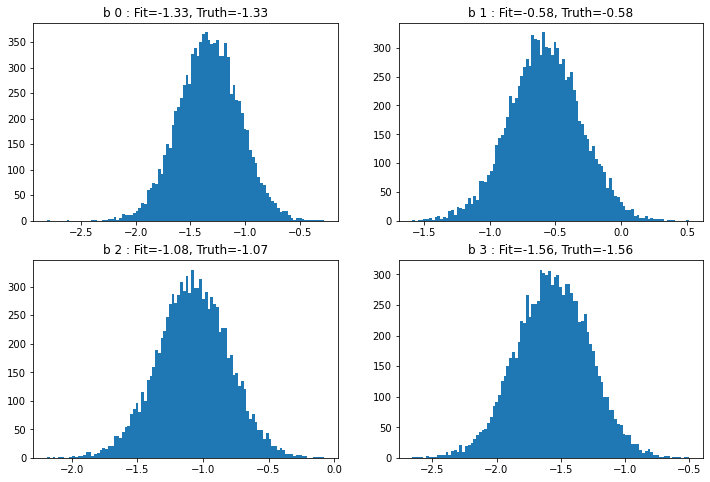

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

bmeans = df.mean()
fig =plt.figure(figsize = (12,8))
for i in range(K):
    fig.add_subplot(2,2,i+1)
    plt.hist(df['b'+str(i)], bins=100)
    plt.plot()
    plt.title('b {} : Fit={}, Truth={}'.format(i, np.round(bmeans[i],2), np.round(Beta[i],2)))